## Summarize what this notebook is doing

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy.stats import gaussian_kde


## Walk through whats going on here

In [2]:
def build_kde_line(indata, bins, covariance_factor=.2):
    """
    Function that builds a kernel density estimate from a 1D matrix using
    a set of bins and a defined covariance factor. Smaller covariance the 
    tighter the fitting
    
    Parameters
    ---------
        to do
        
    """
    
    # sets the histogram bin width
    binwidth = bins[1]-bins[0]
    
    density = gaussian_kde(indata)
    density.covariance_factor = lambda : covariance_factor
    density._compute_covariance()
    
    return density(bins)*binwidth


def get_all_histodata(local_rg_data, local_rg_bins):
    
    # compute histogram heights and then normalize to get p(Rg)
    local_rg_histodata = np.histogram(local_rg_data, bins=local_rg_bins)[0]
    local_rg_histodata = local_rg_histodata/sum(local_rg_histodata)
    
    # perform kernel density estimation to build smoothed curve 
    density_estimate = build_kde_line(local_rg_data, local_rg_bins)
    
    return (local_rg_histodata, density_estimate)
    
    
    
def plot_rg_distribution(local_rg_data, local_rg_bins):
    
    
    binwidth = local_rg_bins[1] - local_rg_bins[0]
    
    (local_rg_histodata, density_estimate) = get_all_histodata(local_rg_data, local_rg_bins)
    
    
    # create new figure
    figure(num=None, figsize=(5, 4), dpi=300, facecolor='w', edgecolor='k')
    
    # plot raw data
    plt.bar(local_rg_bins[:-1]+binwidth*0.5, local_rg_histodata, alpha=0.4, color='k', width=binwidth*0.9)

    # 
    plt.plot(local_rg_bins, density_estimate,'k', linewidth=1.5)




## Walk through whats going on here

In [18]:
from camparitraj.cttrajectory import CTTrajectory

# note - relative path on my system...
data_directory = '../../../manuscript/data/actr'

trajectory_file = '%s/full.xtc'%(data_directory)
topology_file = '%s/full.pdb'%(data_directory)

CT = CTTrajectory(trajectory_file, topology_file)
CP = CT.proteinTrajectoryList[0]



## Walk through whats going on here

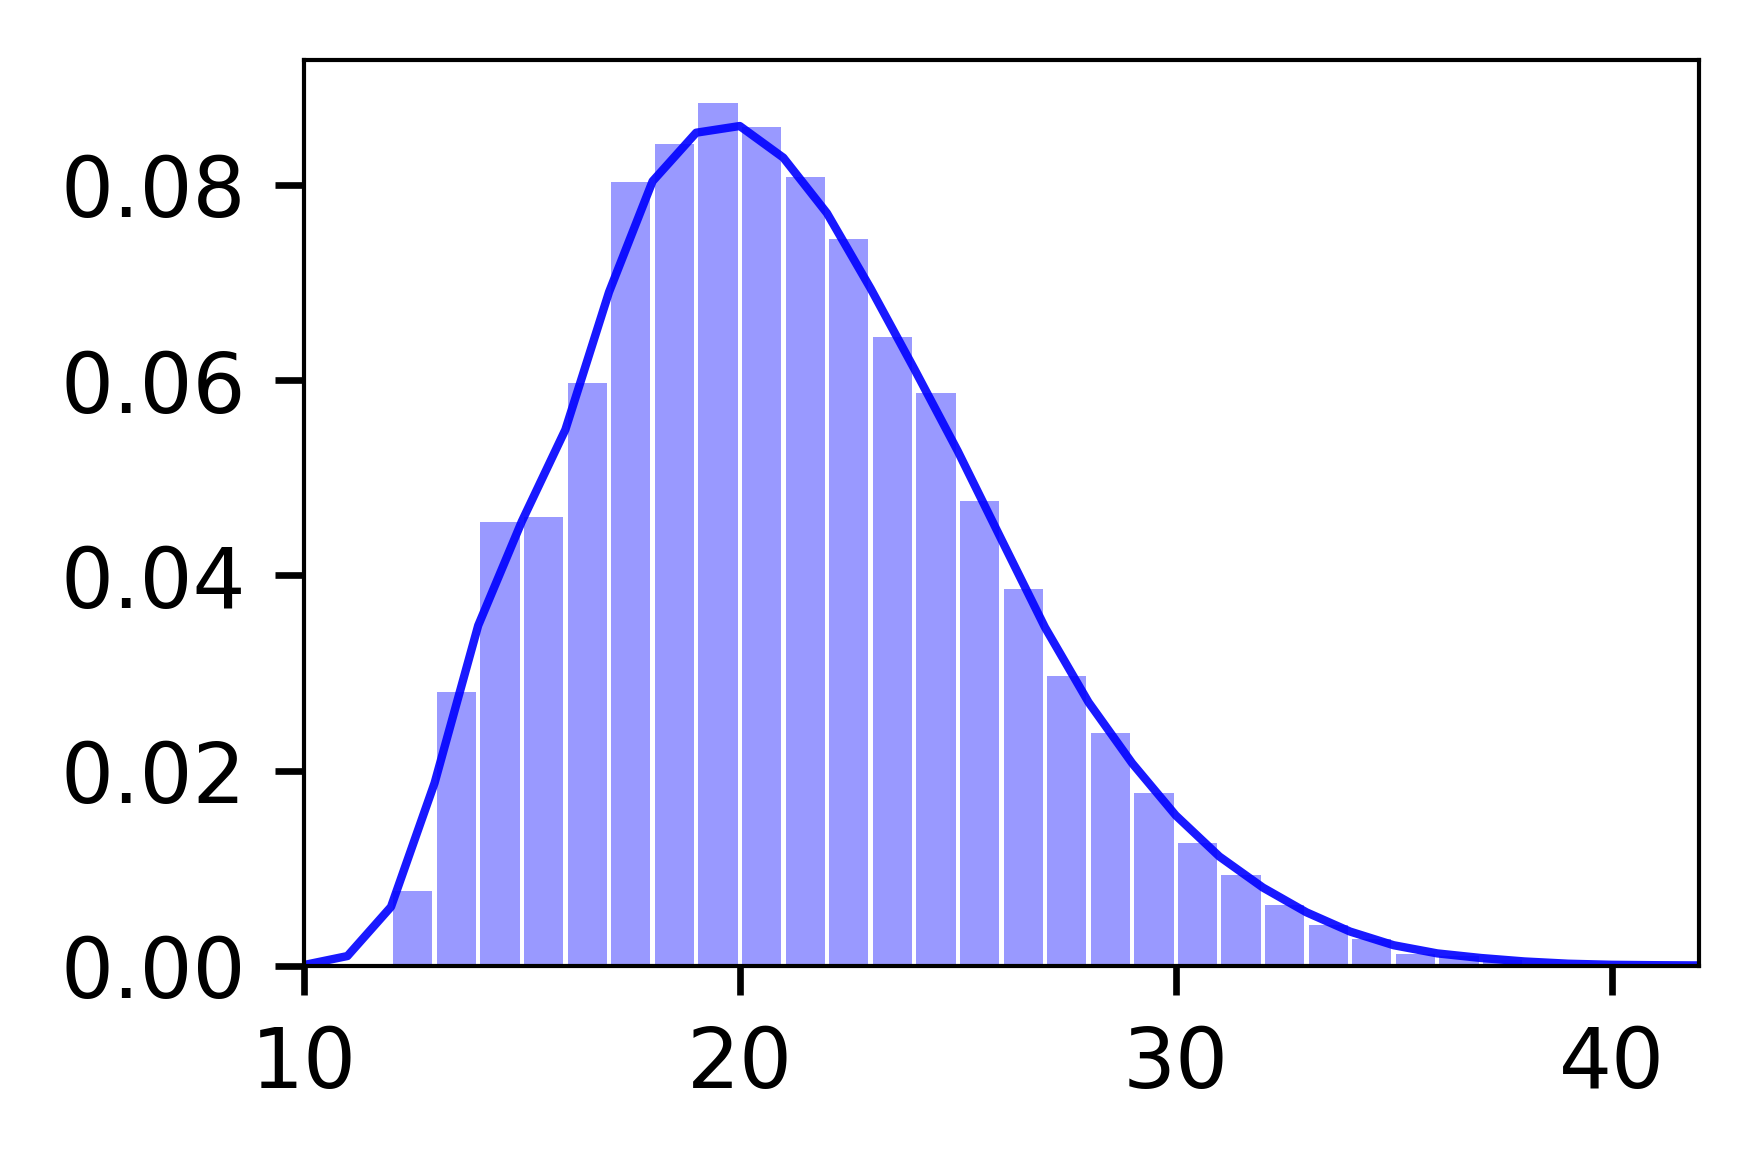

In [17]:

# compute re-frame Rg
all_rg = CP.get_radius_of_gyration()
bins = np.arange(0,55,1)
binwidth = bins[1] - bins[0]


(local_rg_histodata, density_estimate) = get_all_histodata(all_rg, bins)

figure(num=None, figsize=(3, 2), dpi=300, facecolor='w', edgecolor='b')

plt.bar(bins[:-1]+binwidth*0.5, local_rg_histodata, alpha=0.4, color='b', width=binwidth*0.9)
plt.plot(bins, density_estimate,'b', linewidth=1, alpha=0.9)

plt.xlim([10, 42])

# make nice etc

plt.savefig('actr_rg_distribution.pdf')



